In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import  train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [2]:
df_copy = pd.read_csv('StudentsPerformance.csv')
df = df_copy.copy()

In [3]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
df.shape

(1000, 8)

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [7]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [8]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [9]:
df['test preparation course'].value_counts()

test preparation course
none         642
completed    358
Name: count, dtype: int64

In [10]:
df['test preparation course'] = df['test preparation course'].apply(
    lambda x: 0 if x=='none' else 1
)

In [11]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,0,72,72,74
1,female,group C,some college,standard,1,69,90,88
2,female,group B,master's degree,standard,0,90,95,93
3,male,group A,associate's degree,free/reduced,0,47,57,44
4,male,group C,some college,standard,0,76,78,75


In [12]:
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [13]:
bool(0)

False

In [14]:
bool(1)

True

In [15]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

In [16]:
features = ['reading score','writing score']
target = ['math score']

In [17]:
df_model = df[features + target].copy()

In [18]:
df_model.head()

,reading score,writing score,math score
0,72,74,72
1,90,88,69
2,95,93,90
3,57,44,47
4,78,75,76


In [19]:
df_model.isnull().sum()

reading score    0
writing score    0
math score       0
dtype: int64

In [20]:
df_model.corr()

,reading score,writing score,math score
reading score,1.000000,0.954598,0.817580
writing score,0.954598,1.000000,0.802642
math score,0.817580,0.802642,1.000000


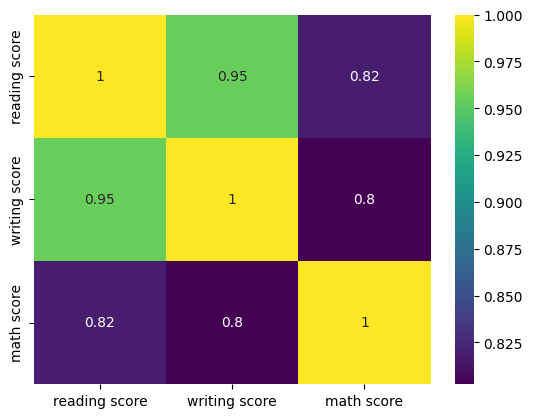

In [21]:
sns.heatmap(df_model.corr(), annot=True, cmap='viridis')
plt.show()

In [22]:
X = df_model[features]
y = df_model[target]

In [23]:
x_train, x_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

In [24]:
x_train

,reading score,writing score
716,78,72
351,57,52
936,57,53
256,73,68
635,74,64
...,...,...
106,100,100
270,63,61
860,62,53
435,48,53


In [25]:
y_train

,math score
716,73
351,66
936,67
256,64
635,71
...,...
106,87
270,69
860,53
435,50


In [26]:
x_train.shape

(900, 2)

In [27]:
y_train.shape

(900, 1)

In [28]:
x_test.shape

(100, 2)

In [29]:
y_test.shape

(100, 1)

In [30]:
scalar = StandardScaler()
x_train_scaled = scalar.fit_transform(x_train)
x_test_scaled = scalar.transform(x_test)

In [31]:
model = LinearRegression()

In [32]:
model.fit(x_train_scaled,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [33]:
y_pred = model.predict(x_test_scaled)

In [34]:
mae = mean_absolute_error(y_test,y_pred)
print(mae)

7.103856556321352


In [35]:
mse = mean_squared_error(y_test,y_pred)
print(mse)

74.94163033031793
